EDA

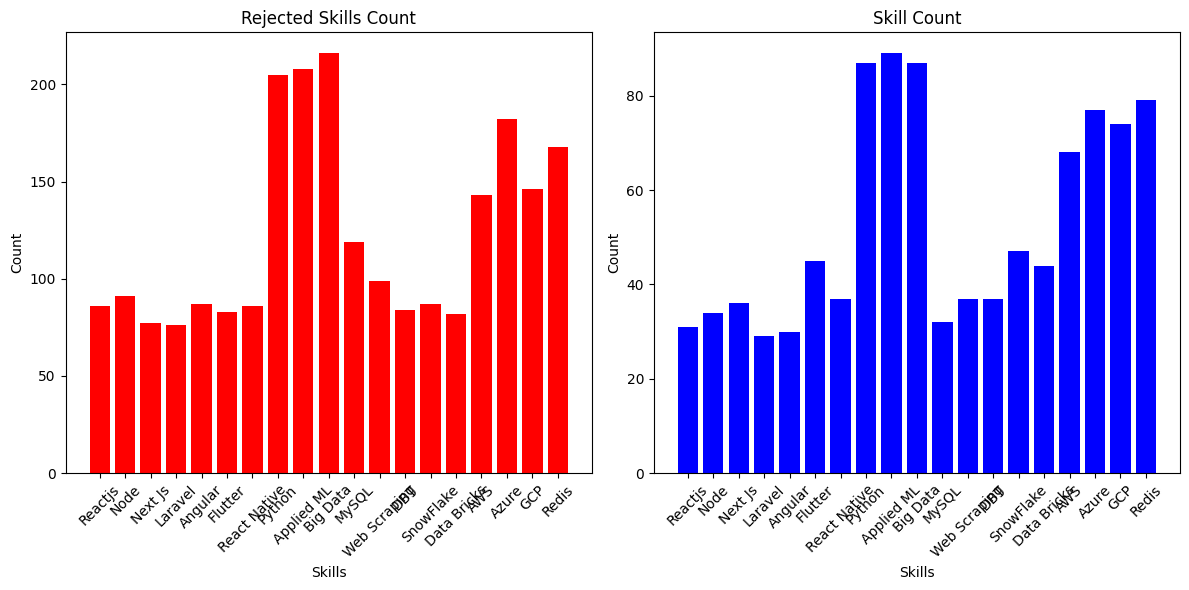

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for your CSV files
rejected_file_path = "../REPORTING/rejected_skill_count.csv"
skill_count_file_path = '../REPORTING/skill_counts.csv'

# Read the CSV files into DataFrames
rejected_df = pd.read_csv(rejected_file_path)
skill_count_df = pd.read_csv(skill_count_file_path)

# Set up the bar graph for rejected skills
plt.figure(figsize=(12, 6))

# Bar graph for rejected skills
plt.subplot(1, 2, 1)
plt.bar(rejected_df['Skill'], rejected_df['Count'], color='red')
plt.title('Rejected Skills Count')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Bar graph for skill counts
plt.subplot(1, 2, 2)
plt.bar(skill_count_df['Skill'], skill_count_df['Count'], color='blue')
plt.title('Skill Count')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()


In [15]:
import pandas as pd

# Load the CSV file
file_path = 'D:\Projects\Web Scraping\Final Project\REPORTING\skillset_with_target_column.csv'  
df = pd.read_csv(file_path)

columns_to_drop = ['id','Suggested Skill']
df_cleaned = df.drop(columns=columns_to_drop)

# Save the cleaned DataFrame to a new CSV file
output_file_path = 'required_data_v2.csv'  # Update the output file path as needed
df_cleaned.to_csv(output_file_path, index=False)

print("New file created:", output_file_path)


New file created: required_data_v2.csv


<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
C:\Users\PardhuMahidhar\AppData\Local\Temp\ipykernel_16076\3946271672.py:4: SyntaxWarning: invalid escape sequence '\P'
  file_path = 'D:\Projects\Web Scraping\Final Project\REPORTING\skillset_with_target_column.csv'


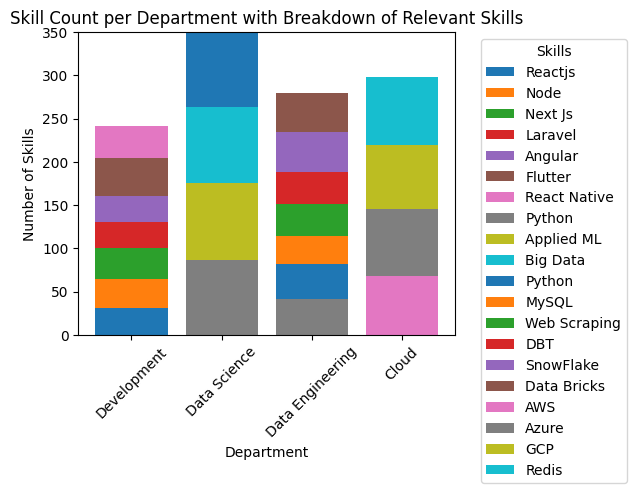

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data
df = pd.read_csv('required_data_v2.csv')

# Step 2: Define the departments and their skills
departments = {
    'Development': ['Reactjs', 'Node', 'Next Js', 'Laravel', 'Angular', 'Flutter', 'React Native'],
    'Data Science': ['Python', 'Applied ML', 'Big Data'],
    'Data Engineering': ['Python', 'MySQL', 'Web Scraping', 'DBT', 'SnowFlake', 'Data Bricks'],
    'Cloud': ['AWS', 'Azure', 'GCP', 'Redis']
}

# Step 3: Initialize a skill count dictionary for each department
department_skill_count = {dept: {skill: 0 for skill in skills} for dept, skills in departments.items()}

# Step 4: Count the relevant skills for each employee based on the department
for index, row in df.iterrows():
    skills = row['Skillset'].split(', ')  # Split the skills for each employee
    department = row['CourseDepartment']  # Get the department
    
    if department in departments:
        department_skills = departments[department]  # Get relevant skills for the department
        # Count how many times each skill appears in the skillset
        for skill in skills:
            if skill in department_skills:
                department_skill_count[department][skill] += 1

# Step 5: Prepare data for stacked bar plot
departments_list = list(department_skill_count.keys())

# Prepare skill data only for relevant skills in each department
skill_data = {dept: [] for dept in departments_list}
for department in departments_list:
    skill_data[department] = [department_skill_count[department][skill] for skill in departments[department]]

# Plot the stacked bar chart for each department with its relevant skills
bottom = [0] * len(departments_list)  # For stacking bars

# Create separate bars for each skill, relevant to each department
for department in departments_list:
    for skill in departments[department]:
        counts = [department_skill_count[dept].get(skill, 0) for dept in departments_list]
        plt.bar(departments_list, counts, bottom=bottom, label=skill)
        bottom = [i + j for i, j in zip(bottom, counts)]  # Update bottom for stacking

plt.title('Skill Count per Department with Breakdown of Relevant Skills')
plt.xlabel('Department')
plt.ylabel('Number of Skills')
plt.xticks(rotation=45)
plt.legend(title='Skills', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.tight_layout()

# Show the graph
plt.show()



C:\Users\PardhuMahidhar\AppData\Local\Temp\ipykernel_16076\2196369708.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(skills))(np.arange(len(skills)))


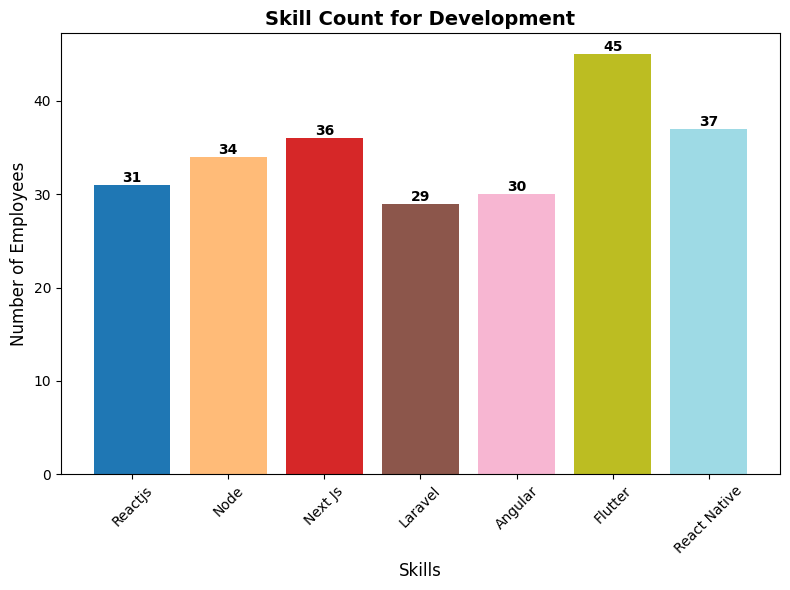

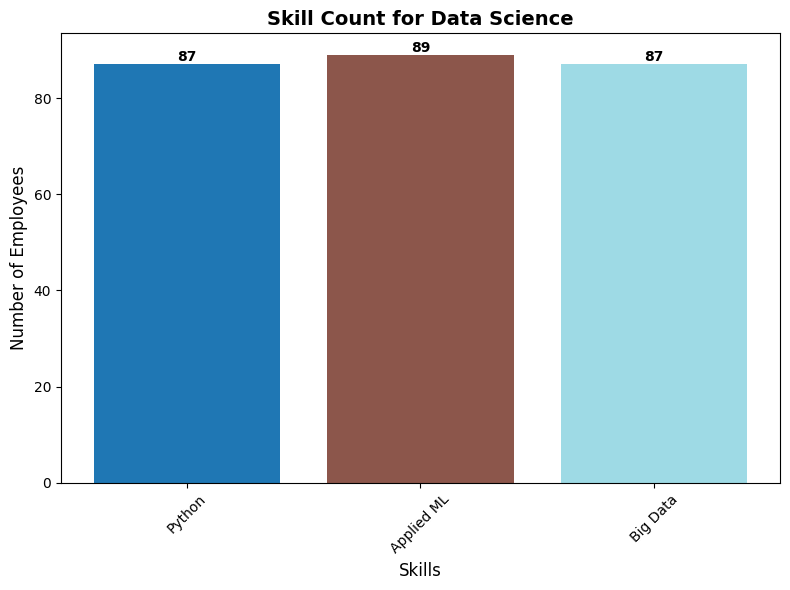

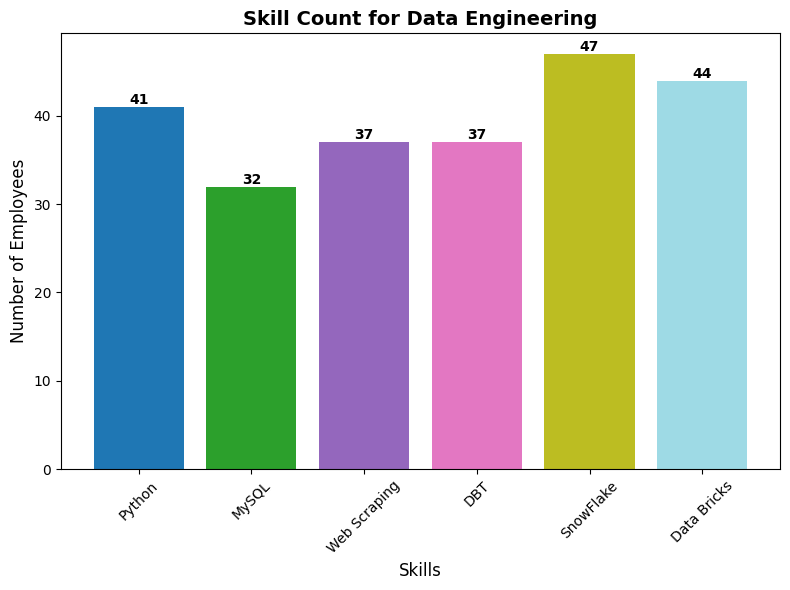

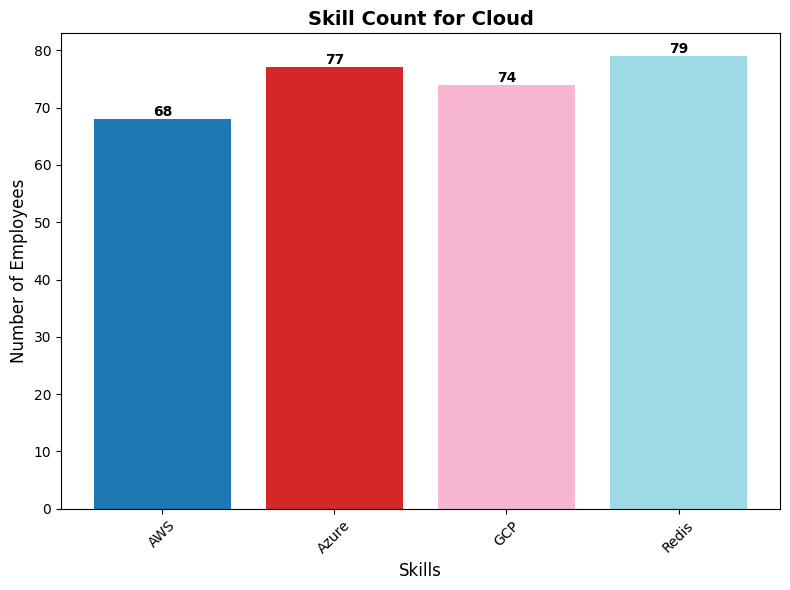

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the data
df = pd.read_csv('required_data_v2.csv')

# Step 2: Define the departments and their skills
departments = {
    'Development': ['Reactjs', 'Node', 'Next Js', 'Laravel', 'Angular', 'Flutter', 'React Native'],
    'Data Science': ['Python', 'Applied ML', 'Big Data'],
    'Data Engineering': ['Python', 'MySQL', 'Web Scraping', 'DBT', 'SnowFlake', 'Data Bricks'],
    'Cloud': ['AWS', 'Azure', 'GCP', 'Redis']
}

# Step 3: Initialize a skill count dictionary for each department
department_skill_count = {dept: {skill: 0 for skill in skills} for dept, skills in departments.items()}

# Step 4: Count the relevant skills for each employee based on the department
for index, row in df.iterrows():
    skills = row['Skillset'].split(', ')  # Split the skills for each employee
    department = row['CourseDepartment']  # Get the department
    
    if department in departments:
        department_skills = departments[department]  # Get relevant skills for the department
        # Count how many times each skill appears in the skillset
        for skill in skills:
            if skill in department_skills:
                department_skill_count[department][skill] += 1

# Step 5: Plot individual bar graphs for each department
for department, skill_counts in department_skill_count.items():
    skills = list(skill_counts.keys())
    counts = list(skill_counts.values())

    plt.figure(figsize=(8, 6))  # Set the size of the plot
    
    # Generate a color map based on the number of skills
    colors = plt.cm.get_cmap('tab20', len(skills))(np.arange(len(skills)))
    
    # Create the bar plot with color
    bars = plt.bar(skills, counts, color=colors)
    
    # Add count labels at the top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Set plot titles and labels
    plt.title(f'Skill Count for {department}', fontsize=14, fontweight='bold')
    plt.xlabel('Skills', fontsize=12)
    plt.ylabel('Number of Employees', fontsize=12)
    plt.xticks(rotation=45)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the graph
    plt.show()


Model Traing

In [105]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter

# Step 1: Load the dataset
data = pd.read_csv('required_data_v2.csv')

# Step 2: Preprocess the Skillset column
data['Skillset'] = data['Skillset'].str.split(', ')  # Split skills into lists

# Step 3: One-hot encode the Skillset for KNN (if you still need this for other purposes)
mlb = MultiLabelBinarizer()
skills_encoded = mlb.fit_transform(data['Skillset'])

# Step 4: Create a KNN model (if you still need this for other purposes)
knn = NearestNeighbors(n_neighbors=3, metric='euclidean')  # Adjust n_neighbors as needed
knn.fit(skills_encoded)

# Step 5: Define a function to suggest the most common skill in the department
def suggest_top_skill(employee_id):
    # Find the index of the employee
    employee_index = data[data['employeeId'] == employee_id].index[0]
    
    # Get the department of the employee
    employee_department = data['CourseDepartment'].iloc[employee_index]
    
    # Get the employees in the same department
    department_employees = data[data['CourseDepartment'] == employee_department]
    
    # Collect all skills in the department
    all_skills_in_dept = [skill for skills in department_employees['Skillset'] for skill in skills]

    # Count the occurrences of each skill
    skill_counts = Counter(all_skills_in_dept)

    # Remove current employee's skills from the counts
    current_skills = set(data['Skillset'].iloc[employee_index])
    for skill in current_skills:
        if skill in skill_counts:
            del skill_counts[skill]

    # Get the most common skill
    if skill_counts:
        top_skill, _ = skill_counts.most_common(1)[0]  # Get the most common skill
        return top_skill
    else:
        return "No new skills to suggest in the department."

# Step 6: Apply the suggestion function for a specific employee
employee_id_to_suggest = 'JMD145'  # Change this to the employee ID you want to suggest skills for
suggested_skill = suggest_top_skill(employee_id_to_suggest)

# Step 7: Display the results
print(f"Suggested Skill for Employee ID {employee_id_to_suggest}: {suggested_skill}")


Suggested Skill for Employee ID JMD145: Redis


                  precision    recall  f1-score   support

           Cloud       1.00      1.00      1.00        31
Data Engineering       1.00      0.70      0.82        10
    Data Science       0.91      1.00      0.95        30
     Development       1.00      1.00      1.00        29

        accuracy                           0.97       100
       macro avg       0.98      0.93      0.94       100
    weighted avg       0.97      0.97      0.97       100

Accuracy: 0.97


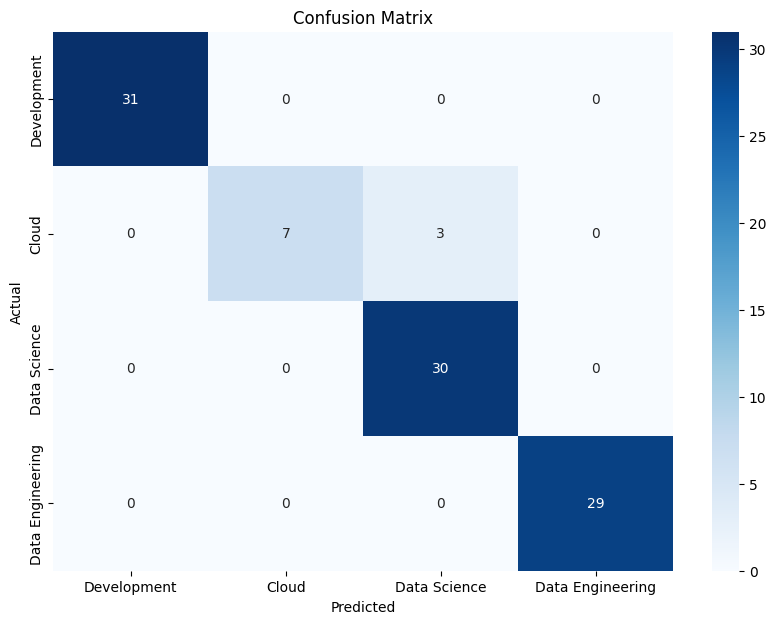

Suggested Skill for Employee ID JMD145: Redis


In [108]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('required_data_v2.csv')

# Step 2: Preprocess the Skillset column
data['Skillset'] = data['Skillset'].str.split(', ')  # Split skills into lists

# Step 3: One-hot encode the Skillset for KNN
mlb = MultiLabelBinarizer()
skills_encoded = mlb.fit_transform(data['Skillset'])

# Step 4: Create a KNN model and split the data
X = skills_encoded  # Features (one-hot encoded skills)
y = data['CourseDepartment']  # Target (departments)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Fit the KNN model
knn = NearestNeighbors(n_neighbors=3, metric='euclidean')  # Adjust n_neighbors as needed
knn.fit(X_train)

# Step 6: Define a function to suggest the most common skill in the department
def suggest_top_skill(employee_id):
    # Find the index of the employee
    employee_index = data[data['employeeId'] == employee_id].index[0]
    
    # Get the department of the employee
    employee_department = data['CourseDepartment'].iloc[employee_index]
    
    # Get the employees in the same department
    department_employees = data[data['CourseDepartment'] == employee_department]
    
    # Collect all skills in the department
    all_skills_in_dept = [skill for skills in department_employees['Skillset'] for skill in skills]

    # Count the occurrences of each skill
    skill_counts = Counter(all_skills_in_dept)

    # Remove current employee's skills from the counts
    current_skills = set(data['Skillset'].iloc[employee_index])
    for skill in current_skills:
        if skill in skill_counts:
            del skill_counts[skill]

    # Get the most common skill
    if skill_counts:
        top_skill, _ = skill_counts.most_common(1)[0]  # Get the most common skill
        return top_skill
    else:
        return "No new skills to suggest in the department."

# Step 7: Make predictions for the test set
predicted_departments = []
for i in range(len(X_test)):
    distances, indices = knn.kneighbors([X_test[i]])
    neighbor_departments = y_train.iloc[indices[0]].values
    most_common_department = Counter(neighbor_departments).most_common(1)[0][0]
    predicted_departments.append(most_common_department)

# Step 8: Evaluate the model
print(classification_report(y_test, predicted_departments))
accuracy = accuracy_score(y_test, predicted_departments)
print(f"Accuracy: {accuracy:.2f}")

# Step 9: Confusion Matrix
conf_matrix = confusion_matrix(y_test, predicted_departments)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=data['CourseDepartment'].unique(),
            yticklabels=data['CourseDepartment'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Step 10: Apply the suggestion function for a specific employee
employee_id_to_suggest = 'JMD145'  # Change this to the employee ID you want to suggest skills for
suggested_skill = suggest_top_skill(employee_id_to_suggest)

# Step 11: Display the results
print(f"Suggested Skill for Employee ID {employee_id_to_suggest}: {suggested_skill}")


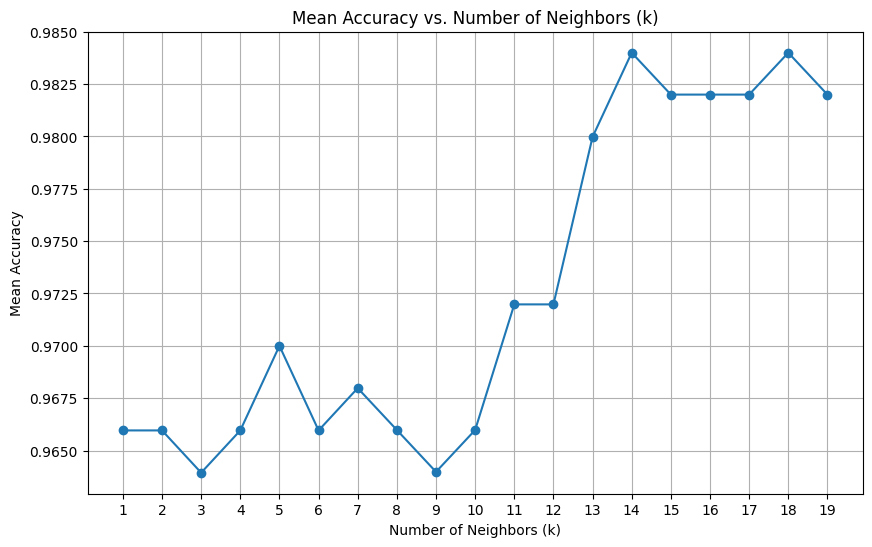

Best value of k: 14
Accuracy: 0.98
Precision: 0.98125
F1 Score: 0.9792114695340501
Recall: 0.98


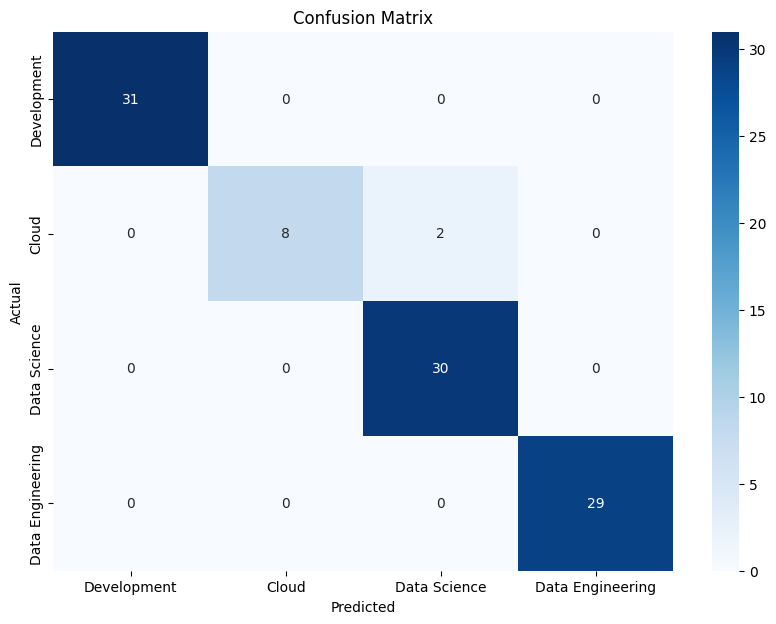

Suggested Skill for Employee ID JMD145: Redis


In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, f1_score, recall_score  # Added metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
data = pd.read_csv('required_data_v2.csv')

# Step 2: Preprocess the Skillset column
data['Skillset'] = data['Skillset'].str.split(', ')  # Split skills into lists

# Step 3: One-hot encode the Skillset for KNN
mlb = MultiLabelBinarizer()
skills_encoded = mlb.fit_transform(data['Skillset'])

# Step 4: Create features (X) and target (y)
X = skills_encoded  # Features (one-hot encoded skills)
y = data['CourseDepartment']  # Target (departments)

# Step 5: Evaluate different values of k using cross-validation
k_values = range(1, 20)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')  # Use KNeighborsClassifier
    scores = cross_val_score(knn, X, y, cv=5)  # Perform cross-validation
    accuracies.append(scores.mean())

# Plot the accuracies for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy vs. Number of Neighbors (k)')
plt.xticks(k_values)
plt.grid()
plt.show()

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Fit the KNN model with the best k value (you can choose the best k from the plot)
best_k = accuracies.index(max(accuracies)) + 1  # Get the best k based on accuracy
print(f"Best value of k: {best_k}")

knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')  # Create KNN model with best k
knn.fit(X_train, y_train)  # Fit the model to the training data

# Step 8: Make predictions for the test set
predicted_departments = knn.predict(X_test)  # Use predict method on test set

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, predicted_departments)
precision = precision_score(y_test, predicted_departments, average='weighted')  # Calculate precision
f1 = f1_score(y_test, predicted_departments, average='weighted')  # Calculate F1 score
recall = recall_score(y_test, predicted_departments, average='weighted')  # Calculate recall

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
print("Recall:", recall)

# Step 10: Confusion Matrix
conf_matrix = confusion_matrix(y_test, predicted_departments)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=data['CourseDepartment'].unique(),
            yticklabels=data['CourseDepartment'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Step 11: Define a function to suggest the most common skill in the department
def suggest_top_skill(employee_id):
    # Find the index of the employee
    employee_index = data[data['employeeId'] == employee_id].index[0]
    
    # Get the department of the employee
    employee_department = data['CourseDepartment'].iloc[employee_index]
    
    # Get the employees in the same department
    department_employees = data[data['CourseDepartment'] == employee_department]
    
    # Collect all skills in the department
    all_skills_in_dept = [skill for skills in department_employees['Skillset'] for skill in skills]

    # Count the occurrences of each skill
    skill_counts = Counter(all_skills_in_dept)

    # Remove current employee's skills from the counts
    current_skills = set(data['Skillset'].iloc[employee_index])
    for skill in current_skills:
        if skill in skill_counts:
            del skill_counts[skill]

    # Get the most common skill
    if skill_counts:
        top_skill, _ = skill_counts.most_common(1)[0]  # Get the most common skill
        return top_skill
    else:
        return "No new skills to suggest in the department."

# Step 12: Apply the suggestion function for a specific employee
employee_id_to_suggest = 'JMD145'  # Change this to the employee ID you want to suggest skills for
suggested_skill = suggest_top_skill(employee_id_to_suggest)

# Step 13: Display the results
print(f"Suggested Skill for Employee ID {employee_id_to_suggest}: {suggested_skill}")
